In [1]:
#importing the libraries
from __future__ import print_function
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
import pickle
import pandas as pd
import numpy as np
import sys
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.svm import SVC
from sklearn import svm
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from sklearn.model_selection import StratifiedShuffleSplit
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.svm import LinearSVC
! pip install sklearn-porter
from sklearn_porter import Porter

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


You are using pip version 18.0, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
#Data Reading
def DataLoad_PreProcess():
    response = pd.read_csv('C:\\Users\\dell\\Desktop\\test proj\\TCGA-PANCAN-HiSeq-801x20531\\labels.csv')
    #Renaming reponse column as Class
    response = response["Class"]

    # read feature data
    features = pd.read_csv('C:\\Users\\dell\\Desktop\\test proj\\TCGA-PANCAN-HiSeq-801x20531\\data.csv')
    x_features = features.drop('Sample_No', axis=1).values
    y_response = response
    
    label_enc = preprocessing.LabelEncoder()
    label_enc.fit(["PRAD", "LUAD", "BRCA", "KIRC","COAD"])
    label_enc.transform(["PRAD", "LUAD", "BRCA", "KIRC", "COAD"])
    y_response = label_enc.transform(response).astype(int)

    return x_features, y_response

In [3]:
#Feature Selection 1: PCA
def Prinicipal_Components(n_features):
    selector = PCA(n_components=n_features)
    
    return selector

In [4]:
#Feature Selection 2: Annova
def Annova_FeatSelection(n_features):
    selector = SelectKBest(f_classif, n_features)
    
    return selector

In [48]:
def LinearDisAnalysis():
    lda = LDA()
    
    return lda

In [15]:
#Classifier : SVM
def SupportVectorMachine():
    svm = SVC(kernel="rbf" , C = 1 , gamma = 1, probability = True)
    #parameters = {'kernel':('linear', 'rbf'), 'C':(1,0.25,0.5,0.75),'gamma': (1,2,3,'auto'),'decision_function_shape':('ovo','ovr'),'shrinking':(True,False)}
    #clf = GridSearchCV(svm, parameters)
    
    return svm            

In [10]:
#CLassifier: K Nearest Neighbour
def KNearestNeigh(n_neighbors):
     knn = KNeighborsClassifier(n_neighbors)
    
     return knn

In [59]:
#CLassifier: Decision Trees
def DecisionTree():
    #riterion='entropy'
    dtree_model = DecisionTreeClassifier()
    
    return dtree_model

In [5]:
#Classifier: NaiveBayes
def NaiveBayes():
    gnb=GaussianNB()
    
    return gnb

In [61]:
#Linear Regression
def Linear_Regression():
    linearRegr = LinearRegression()
    return linearRegr  

In [62]:
#Logistic Regression
def Logistic_Regression():
    logisticRegr = LogisticRegression()
    
    return logisticRegr

In [63]:
#Accuracy calculation
def Accuracy_Calc(X, y, cls_obj):
    accuracy = cls_obj.score(X, y)
    
    return accuracy

In [12]:
# Main loop including cross validation using KFolds
folds = 5
kfold = KFold(folds, shuffle=True)
sum_train_accu=0
sum_test_accu=0
nfeat =100

FeatureSelectionMethod = "PCA" # 1. SKBest 2. PCA 3.LDA
ClassifierMethod = "KNearestNeighbours" # 1. SVM, 2. KNearestNeighbours 3. DecisionTree 4. NaiveBayes 5. LinearRegression 6. LogisticRegression

X_data, y_data = DataLoad_PreProcess()
for train, test in kfold.split(X_data):
    
    X_train, X_test, y_train, y_test = X_data[train], X_data[test], y_data[train], y_data[test]
    if(FeatureSelectionMethod == "SKBest"):
    # SKBest
        selector_SKBest = Annova_FeatSelection(n_features=nfeat)
        X_train_lowdim = selector_SKBest.fit_transform(X=X_train, y=y_train)
        X_test_lowdim = selector_SKBest.fit_transform(X=X_test, y=y_test)
    elif(FeatureSelectionMethod == "PCA"):
    # PCA
        selector_PCA = Prinicipal_Components(n_features=nfeat)
        X_train_lowdim = selector_PCA.fit_transform(X_train)
        X_test_lowdim = selector_PCA.fit_transform(X_test)
        
     
    elif(FeatureSelectionMethod=="LDA"):
     #LDA   
        selector_LDA = LinearDisAnalysis()
        X_train_lowdim = selector_LDA.fit_transform(X_train,y_train)
        X_test_lowdim = selector_LDA.fit_transform(X_test,y_test)
   
        
    else:
        print("Feature selection method not selected!!!!!")
        sys.exit()
        
     
    if(ClassifierMethod == "SVM"):
        cls_object = SupportVectorMachine()
     
    elif(ClassifierMethod == "KNearestNeighbours"):
        cls_object=KNearestNeigh(5)
        
    elif(ClassifierMethod=="DecisionTree"):
        cls_object=DecisionTree()
    
    elif(ClassifierMethod=="NaiveBayes"):
        cls_object=NaiveBayes()
        
    elif(ClassifierMethod=="LinearRegression"):
        cls_object=Linear_Regression()
        
    elif(ClassifierMethod=="LogisticRegression"):
        cls_object=Logistic_Regression()
        
    else:
        print("Classifier Not selected!!!")
        sys.exit()
    
    cls_object.fit(X_train_lowdim, y_train)
    y_train_pred = cls_object.predict(X_train_lowdim)
    y_test_pred = cls_object.predict(X_test_lowdim)
    
    #export:
    
    porter = Porter(cls_object, language='js')
    output = porter.export(embed_data=True)
    #print("Porter output", output)
    
    # Save in JS:
    with open('Sample.js', 'w') as f:
        f.write(output)
    

    if(ClassifierMethod == "LinearRegression"):
        y_train_pred_index0 = np.where(y_train_pred <= 0.5)
        y_train_pred_index1 = np.where((y_train_pred > 0.5) & (y_train_pred <= 1.5))
        y_train_pred_index2 = np.where((y_train_pred > 1.5) & (y_train_pred <= 2.5))
        y_train_pred_index3 = np.where((y_train_pred > 2.5) & (y_train_pred <= 3.5))
        y_train_pred_index4 = np.where(y_train_pred > 3.5)
                       
        y_train_pred[y_train_pred_index0] = 0
        y_train_pred[y_train_pred_index1] = 1
        y_train_pred[y_train_pred_index2] = 2
        y_train_pred[y_train_pred_index3] = 3
        y_train_pred[y_train_pred_index4] = 4
        
        y_test_pred_index0 = np.where(y_test_pred <= 0.5)
        y_test_pred_index1 = np.where((y_test_pred > 0.5) & (y_test_pred <= 1.5))
        y_test_pred_index2 = np.where((y_test_pred > 1.5) & (y_test_pred <= 2.5))
        y_test_pred_index3 = np.where((y_test_pred > 2.5) & (y_test_pred <= 3.5))
        y_test_pred_index4 = np.where(y_test_pred > 3.5)
                       
        y_test_pred[y_test_pred_index0] = 0
        y_test_pred[y_test_pred_index1] = 1
        y_test_pred[y_test_pred_index2] = 2
        y_test_pred[y_test_pred_index3] = 3
        y_test_pred[y_test_pred_index4] = 4
        
        y_train_pred = y_train_pred.astype(np.int32)
        y_test_pred = y_test_pred.astype(np.int32)
        y_train.astype(np.int32)
    
        train_acc = accuracy_score(y_train, y_train_pred)
        test_acc = accuracy_score(y_test, y_test_pred)
        
    else:
        train_acc = accuracy_score(y_train, y_train_pred)
        test_acc = accuracy_score(y_test, y_test_pred)
        
    
    
    sum_train_accu += train_acc
    sum_test_accu += test_acc

print("Average Train accuracy",(sum_train_accu)/folds)
print("Average Test accuracy",(sum_test_accu)/folds)

Average Train accuracy 0.998439450078003
Average Test accuracy 0.5992934782608696


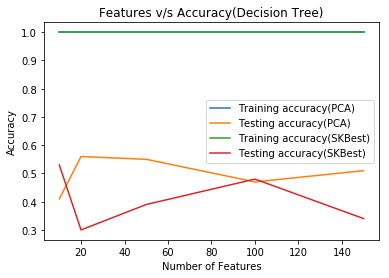

In [89]:
def plot_accuracies(x1, x2,  y1, y2, y3, y4,model_name):
    # plotting the points  
    plt.plot(x1, y1,label="Training accuracy(PCA)")
    plt.plot(x1,y2,label="Testing accuracy(PCA)")

    # plotting the points  
    plt.plot(x2, y3,label="Training accuracy(SKBest)")
    plt.plot(x2,y4,label="Testing accuracy(SKBest)")


    # naming the x axis 
    plt.xlabel('Number of Features') 
    # naming the y axis 
    plt.ylabel('Accuracy') 

    # giving a title to my graph 
    plt.title('Features v/s Accuracy('+model_name+')') 

    plt.legend()

    # function to show the plot 
    plt.show()     


    
#Results for classifier Decision Tree
# x axis values 
x1 = np.array([10,20,50,100,150]) 
# corresponding y1 and y2values 
y1 = np.array([1,1,1,1,1])
y2= np.array([.41,.56,.55,.47,.51])

#using SKBest
x2 = np.array([10,20,50,100,150]) 
y3=np.array([1,1,1,1,1])
y4=np.array([.53,.3,.39,.48,.34])

# plot
plot_accuracies(x1, x2,  y1, y2, y3, y4,"Decision Tree")

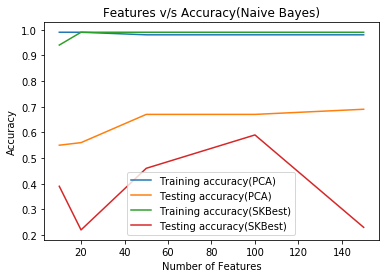

In [90]:
#Results for classifier Naive Bayes
#Using PCA
# x axis values 
x1 = np.array([10,20,50,100,150]) 
# corresponding y1 and y2values 
y1 = np.array([.99,.99,.98,.98,.98])
y2= np.array([.55,.56,.67,.67,.69])

#using SKBest
x2 = np.array([10,20,50,100,150]) 
y3=np.array([.94,.99,.99,.99,.99])
y4=np.array([.39,.22,.46,.59,.23])

plot_accuracies(x1, x2, y1, y2, y3, y4,"Naive Bayes")

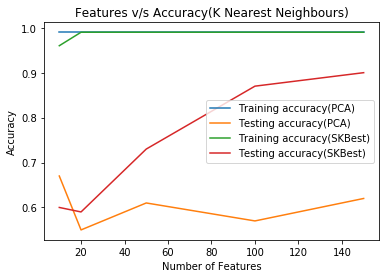

In [91]:
#Results for classifier KNearestNeighbour
#Using PCA
# x axis values 
x1 = np.array([10,20,50,100,150]) 
# corresponding y1 and y2values 
y1 = np.array([.99,.99,.99,.99,.99])
y2= np.array([.67,.55,.61,.57,.62])

#using SKBest
x2 = np.array([10,20,50,100,150]) 
y3=np.array([.96,.99,.99,.99,.99])
y4=np.array([.60,.59,.73,.87,.90])

plot_accuracies(x1, x2, y1, y2, y3, y4,"K Nearest Neighbours")

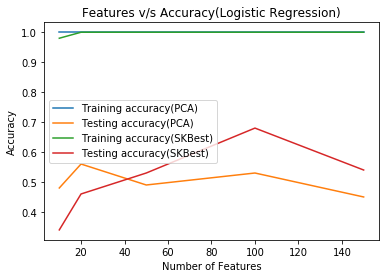

In [92]:
#Results for Logistic Regression
#Using PCA
# x axis values 
x1 = np.array([10,20,50,100,150]) 
# corresponding y1 and y2values 
y1 = np.array([1,1,1,1,1])
y2= np.array([.48,.56,.49,.53,.45])

#using SKBest
x2 = np.array([10,20,50,100,150]) 
y3=np.array([.98,1,1,1,1])
y4=np.array([.34,.46,.53,.68,.54])


plot_accuracies(x1, x2, y1, y2, y3, y4,"Logistic Regression")

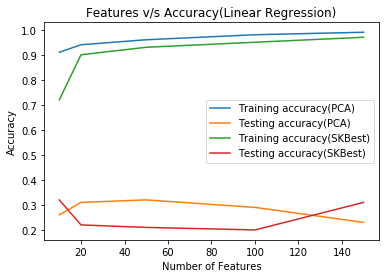

In [93]:
#Results for Linear Regression
#Using PCA
# x axis values 
x1 = np.array([10,20,50,100,150]) 
# corresponding y1 and y2values 
y1 = np.array([.91,.94,.96,.98,.99])
y2= np.array([.26,.31,.32,.29,.23])

#using SKBest
x2 = np.array([10,20,50,100,150]) 
y3=np.array([.72,.90,.93,.95,.97])
y4=np.array([.32,.22,.21,.20,.31])


plot_accuracies(x1, x2, y1, y2, y3, y4,"Linear Regression")

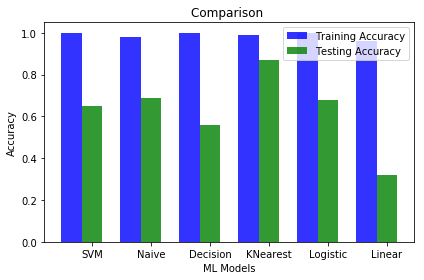

In [7]:
#2) Best feature set in each classifier

#A SVM - SKBest
#B Naive Bayes-PCA
#C Decison tree-PCA
#D KNN-SKBest
#E Linear Regression-PCA
#F Logistic Regression- SKBest

# data to plot
n_groups = 6
train_acc = (1,.98,1,.99,1,.96)
test_acc = (.65,.69,.56,.87,.68,.32)
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index,train_acc, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Training Accuracy')
 
rects2 = plt.bar(index + bar_width,test_acc, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Testing Accuracy')
 
plt.xlabel('ML Models')
plt.ylabel('Accuracy')
plt.title('Comparison ')
plt.xticks(index + bar_width, ('SVM', 'Naive', 'Decision', 'KNearest','Logistic','Linear'))
plt.legend()
 
plt.tight_layout()
plt.show()

feat shape (801, 16384)
resp shape (801,)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [    5    23  4370  4808  4809  4814  4816  4817  4831  5288  7661  7662
  7663  7664  7665  8121  9304  9306  9314  9316  9320  9452 10121 11958
 13991 14158 14159 14161 15138 15140 15141 15446] are constant.
  UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


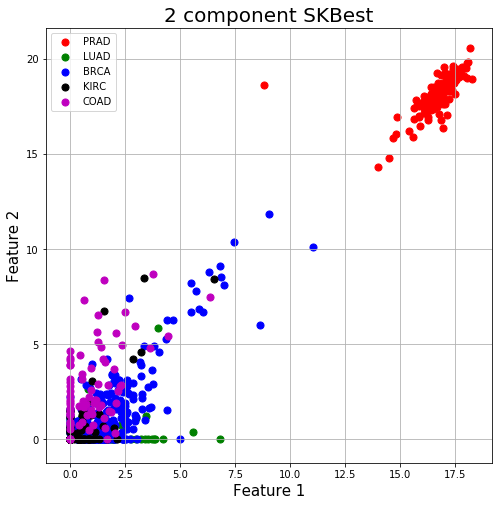

In [67]:
response = pd.read_csv('C:\\Users\\dell\\Desktop\\test proj\\TCGA-PANCAN-HiSeq-801x20531\\labels.csv')
#Renaming reponse column as Class
response = response["Class"]

# read feature data
features = pd.read_csv('C:\\Users\\dell\\Desktop\\test proj\\TCGA-PANCAN-HiSeq-801x20531\\data.csv')
print("feat shape",features.shape)
print("resp shape", response.shape)
x_features = features.drop('Sample_No', axis=1).values
y_response = response

selector_SKBest = Annova_FeatSelection(n_features=2)
X_data_lowdim = selector_SKBest.fit_transform(X=x_features, y=y_response)


principalDf = pd.DataFrame(data = X_data_lowdim
             , columns = ['Feature 1', 'Feature 2'])
finalDf = pd.concat([principalDf, y_response], axis = 1)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Feature 1', fontsize = 15)
ax.set_ylabel('Feature 2', fontsize = 15)
ax.set_title('2 component SKBest', fontsize = 20)

targets = ['PRAD', 'LUAD', 'BRCA', 'KIRC', 'COAD' ]
colors = ['r', 'g', 'b', 'k', 'm']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Class'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'Feature 1']
               , finalDf.loc[indicesToKeep, 'Feature 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

[Text(0,0.5,'Count'),
 Text(0.5,0,'Cancer Types'),
 Text(0.5,1,'Distribution of the labels')]

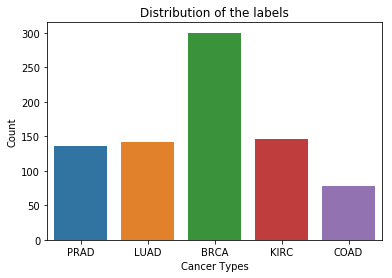

In [68]:
import seaborn as sns
ax = sns.countplot(y_response)
ax.set(title="Distribution of the labels", xlabel="Cancer Types", ylabel="Count")